In [1]:

import random
import numpy as np
import networkx as nx

#tọa độ của các thành phố 
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7], 
                       [15,20], [10,9], [12,12], [46,17], [60,55], [100,80], [16,13]])

#Ma trận kề cho đồ thị trọng số  dựa trên tọa đồ đã cho 
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :       
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

#Khởi tạo/ tìm một giải pháp ngẫu nhiên       
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)

    return solution


#tính toán độ dài lộ trình đựa trên giải pháp ngẫu nhiên đã chọn 
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

#tìm kiếm hàng xóm bằng cách chuyển đổi vị trí của các thành phố để tìm ra hàng xóm tốt nhất 
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
            
    #cập nhật hàng xóm       
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)
    
    #kiểm tra xem còn hàng xóm nào tốt hơn không 
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path


def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    
    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix,current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    return current_path, current_solution


def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])
    
    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == final_solution[1][0]:
            color_map.append('lime')
        else: 
            color_map.append('plum')
    nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])
    return





The solution is 
 [6, 0, 5, 7, 9, 10, 3, 8, 4, 12, 13, 2, 11, 1, 14] 
The path length is 
 283.19341531545314


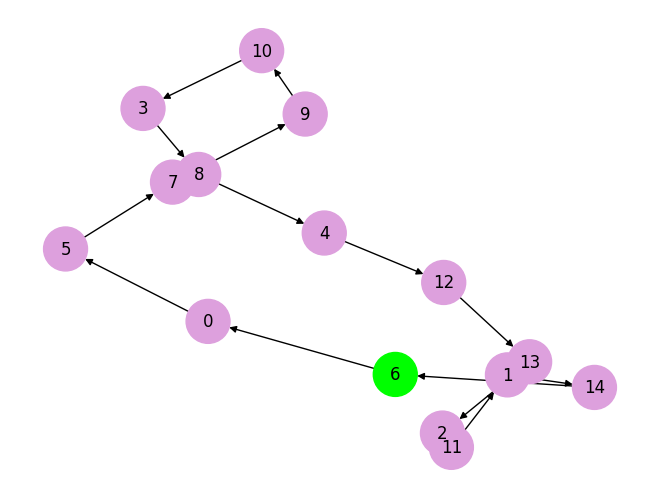

In [2]:
graph(coordinate)

In [3]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from scipy.spatial import distance_matrix
from itertools import combinations
import random

In [10]:
# Khai báo biến toàn cục cho canvas
canvas = None

# Tạo ma trận kề dựa trên khoảng cách Euclidean giữa các điểm
def generate_matrix(coordinate):
    return distance_matrix(coordinate, coordinate)

# Tạo một giải pháp ngẫu nhiên
def solution(matrix):
    return random.sample(range(len(matrix)), len(matrix))

# Tính toán độ dài đường đi
def path_length(matrix, solution):
    return sum(matrix[solution[i]][solution[i - 1]] for i in range(len(solution)))

# Tìm hàng xóm tốt nhất bằng cách hoán đổi hai thành phố
def neighbors(matrix, solution):
    best_neighbor = solution
    best_path = path_length(matrix, solution)
    
    for i, j in combinations(range(len(solution)), 2):
        neighbor = solution.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_neighbor, best_path = neighbor, current_path
            
    return best_neighbor, best_path

# Giải thuật leo đồi
def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    
    while True:
        best_neighbor, best_neighbor_path = neighbors(matrix, current_solution)
        if best_neighbor_path >= current_path:
            break
        current_solution, current_path = best_neighbor, best_neighbor_path
        
    return current_path, current_solution

# Hàm vẽ đồ thị và hiển thị trên GUI
def draw_graph(coordinate):
    global canvas
    final_path_length, final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    G.add_nodes_from(final_solution)
    
    for i in range(1, len(final_solution)):
        G.add_edge(final_solution[i - 1], final_solution[i])
    G.add_edge(final_solution[-1], final_solution[0])
    
    pos = {i: coord for i, coord in enumerate(coordinate)}
    color_map = ['lime' if node == final_solution[0] else 'plum' for node in G]
    
    fig, ax = plt.subplots()
    nx.draw(G, pos, ax=ax, with_labels=True, node_color=color_map, node_size=1000)
    
    # Nếu canvas đã tồn tại, làm sạch nó trước khi vẽ đồ thị mới
    if canvas is not None:
        canvas.get_tk_widget().destroy()
    
    # Tạo canvas mới và hiển thị đồ thị
    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()
    canvas.get_tk_widget().pack()
    plt.close(fig)  # Đóng figure sau khi vẽ để tránh lỗi

# Hàm xử lý khi người dùng nhấn nút "Solve"
def solve_tsp():
    try:
        # Lấy tọa độ từ hộp nhập liệu và chuyển đổi thành mảng numpy
        coord_input = coord_entry.get()
        coord_list = eval(coord_input)
        coordinate = np.array(coord_list)
        
        # Vẽ đồ thị với tọa độ đã nhập
        draw_graph(coordinate)
    except Exception as e:
        messagebox.showerror("Error", "Invalid input. Please enter a valid list of coordinates.")

# Tạo cửa sổ chính
window = tk.Tk()
window.title("Travelling Salesman Problem Solver")
window.configure(bg='#f0f0f0')  # Thiết lập màu nền cho cửa sổ
# Tạo hộp nhập liệu cho tọa độ
coord_label = tk.Label(window, text="Enter coordinates (e.g., [[1,2], [3,4], [5,6]]):", bg='#f0f0f0', fg='black')
coord_label.pack()
coord_entry = tk.Entry(window, width=50)
coord_entry.pack()

# Tạo nút để giải TSP và vẽ đồ thị
solve_button = tk.Button(window, text="Solve TSP", command=solve_tsp,  bg='#d9d9d9', fg='black')
solve_button.pack()

# Chạy vòng lặp chính của tkinter
window.mainloop()